In [1]:
import dill
import math
import numpy as np
from pprint import pprint
from bayes_opt import BayesianOptimization

CURRENT_YEAR = 2023
MAX_YEAR = 2123
years = list(range(CURRENT_YEAR, MAX_YEAR))
delays = {}

exec(open('utils.py').read())
print('Loaded')

Loaded


## Algorithms/insights delay

|   iter    |  target   |   push    |   shift   |   slope   |
-------------------------------------------------------------
| 12        | -0.1875   | 0.548     | 4.051     | 2.022     |
| 40        | -0.1186   | 1.037     | 1.833     | 0.1927    |
| 88        | -0.0828   | 0.3896    | 1.252     | 0.3512    |
| 89        | -0.07138  | 0.1881    | 1.263     | 0.5106    |
| 95        | -0.03381  | 0.1147    | 0.9407    | 0.47      |
Curve params found
{'push': 0.11468776803515983,
 'shift': 0.940725788940889,
 'slope': 0.4699692956263126}
-
## Chance of nonscaling delay ##


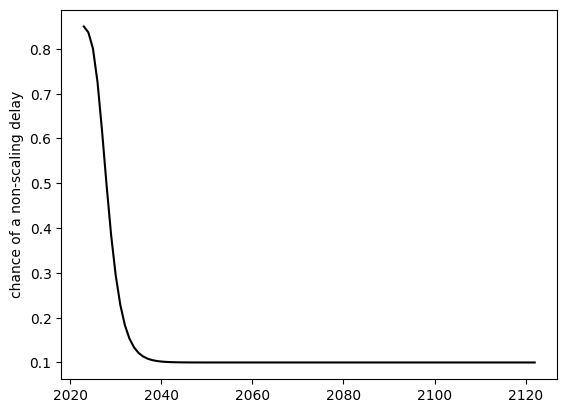

Year: 2023 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 85%
Year: 2024 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 84%
Year: 2025 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 80%
Year: 2026 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 73%
Year: 2027 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 62%
Year: 2028 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 50%
Year: 2029 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 38%
Year: 2030 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 29%
Year: 2031 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 23%
Year: 2032 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 18%
Year: 2033

In [2]:
nonscaling_points = [(2023, 0.85),
                     (2027, 0.7),
                     (2030, 0.3),
                     (2035, 0.2),
                     (2050, 0.1)]
p_nonscaling_delay = derive_nonscaling_delay_curve(nonscaling_points)
delays['algorithms'] = {'prob': p_nonscaling_delay, 'length': sq.mixture([[0.9, sq.lognorm(2, 8)], [0.1, sq.lognorm(3, 30)]])}
plot_nonscaling_delay(plt, years, p_nonscaling_delay)
print('-')
pprint(sq.get_percentiles(delays['algorithms']['length'] @ 1000, digits=0))

## Infrastructure delay

|   iter    |  target   |   push    |   shift   |   slope   |
-------------------------------------------------------------
| 2         | -0.2605   | 2.934     | 4.703     | 9.745     |
| 4         | -0.1528   | 0.345     | 3.351     | 5.754     |
| 24        | -0.15     | 0.1172    | 3.779     | 6.962     |
| 42        | -0.15     | 0.01      | 10.0      | 4.844     |
| 45        | -0.1499   | 0.01      | 8.341     | 3.742     |
| 48        | -0.1499   | 0.01      | 3.461     | 3.424     |
| 68        | -0.1488   | 0.01      | 6.259     | 2.886     |
| 69        | -0.09926  | 0.01      | 2.885     | 1.725     |
| 86        | -0.06768  | 0.01      | 3.258     | 1.608     |
| 110       | -0.04753  | 0.04575   | 8.117     | 1.18      |
| 114       | -0.02197  | 0.04013   | 8.091     | 1.329     |
Curve params found
{'push': 0.040130602856288694,
 'shift': 8.090736486917619,
 'slope': 1.3286217901587054}
-
## Chance of nonscaling delay ##


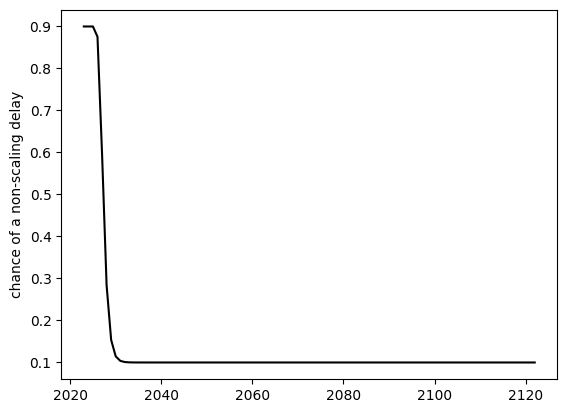

Year: 2023 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 90%
Year: 2024 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 90%
Year: 2025 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 90%
Year: 2026 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 88%
Year: 2027 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 60%
Year: 2028 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 28%
Year: 2029 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 15%
Year: 2030 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 11%
Year: 2031 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 10%
Year: 2032 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 10%
Year: 2033

In [3]:
# https://twitter.com/ohlennart/status/1645058017119854592
nonscaling_points = [(2023, 0.9),
                     (2027, 0.6),
                     (2030, 0.2),
                     (2050, 0.1)]
p_nonscaling_delay = derive_nonscaling_delay_curve(nonscaling_points)
delays['infra'] = {'prob': p_nonscaling_delay, 'length': sq.mixture([[0.9, sq.lognorm(1, 8)], [0.1, sq.lognorm(3, 10)]])}
plot_nonscaling_delay(plt, years, p_nonscaling_delay)
print('-')
pprint(sq.get_percentiles(delays['infra']['length'] @ 1000, digits=0))

## Data delay

|   iter    |  target   |   push    |   shift   |   slope   |
-------------------------------------------------------------
| 2         | -0.4      | 3.761     | 2.759     | 5.291     |
| 3         | -0.4      | 8.856     | 6.129     | 4.528     |
| 5         | -0.3878   | 9.236     | 0.6543    | 0.2972    |
| 13        | -0.3146   | 0.5761    | 4.527     | 1.316     |
| 27        | -0.1339   | 0.7498    | 7.27      | 0.2853    |
| 43        | -0.1286   | 0.8273    | 7.359     | 0.347     |
| 47        | -0.08565  | 0.5578    | 7.489     | 0.5582    |
| 48        | -0.0404   | 0.2672    | 7.857     | 0.7461    |
| 54        | -0.03309  | 0.114     | 8.514     | 0.7997    |
| 66        | -0.02222  | 0.02693   | 9.901     | 1.227     |
| 67        | -0.02076  | 0.1741    | 8.295     | 0.8175    |
| 80        | -0.01932  | 0.08538   | 9.648     | 1.027     |
Curve params found
{'push': 0.08538370374476073,
 'shift': 9.648376862624277,
 'slope': 1.0268285052199448}
-
## Chance of nonscalin

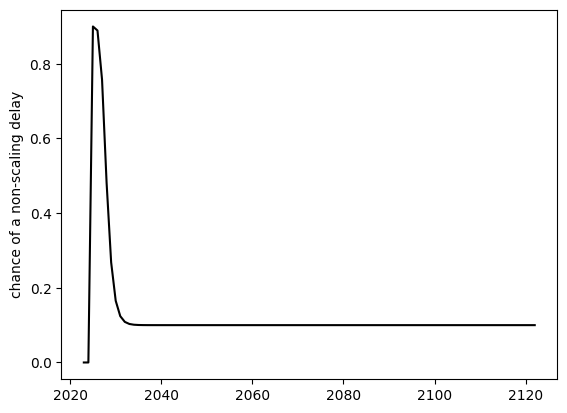

Year: 2023 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 0%
Year: 2024 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 0%
Year: 2025 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 90%
Year: 2026 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 89%
Year: 2027 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 76%
Year: 2028 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 48%
Year: 2029 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 27%
Year: 2030 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 17%
Year: 2031 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 12%
Year: 2032 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 11%
Year: 2033 -

In [4]:
nonscaling_points = {'points': [(2025, 0.9),
                                (2027, 0.8),
                                (2030, 0.2),
                                (2050, 0.1)],
                     'init': 2024}
p_nonscaling_delay = derive_nonscaling_delay_curve(nonscaling_points)
delays['data'] = {'prob': p_nonscaling_delay, 'length': sq.mixture([[0.9, sq.lognorm(1, 8)], [0.1, sq.lognorm(3, 10)]])}
plot_nonscaling_delay(plt, years, p_nonscaling_delay)
print('-')
pprint(sq.get_percentiles(delays['data']['length'] @ 1000, digits=0))

## Robotics need delay

|   iter    |  target   |   push    |   shift   |   slope   |
-------------------------------------------------------------
| 2         | -0.07545  | 0.3795    | 7.799     | 6.078     |
| 29        | -0.07458  | 0.2327    | 6.139     | 1.283     |
| 85        | -0.07301  | 0.01      | 6.632     | 1.532     |
| 116       | -0.02921  | 0.01      | 6.39      | 1.052     |
Curve params found
{'push': 0.01, 'shift': 6.389944379203429, 'slope': 1.0516925780461466}
-
## Chance of nonscaling delay ##


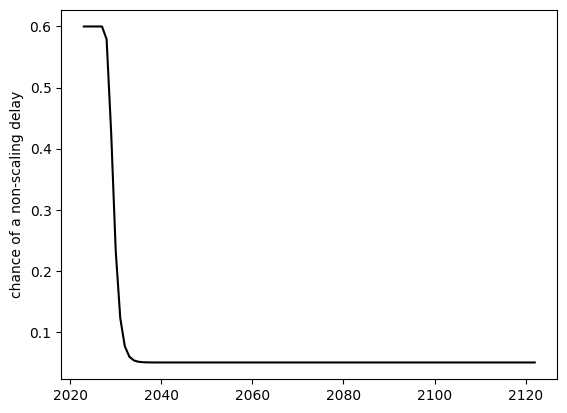

Year: 2023 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 60%
Year: 2024 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 60%
Year: 2025 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 60%
Year: 2026 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 60%
Year: 2027 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 60%
Year: 2028 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 58%
Year: 2029 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 43%
Year: 2030 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 23%
Year: 2031 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 12%
Year: 2032 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 8%
Year: 2033 

In [5]:
nonscaling_points = [(2023, 0.6),
                     (2030, 0.3),
                     (2040, 0.1),
                     (2050, 0.05)]
p_nonscaling_delay = derive_nonscaling_delay_curve(nonscaling_points)
delays['robotics'] = {'prob': p_nonscaling_delay, 'length': sq.mixture([[0.85, sq.lognorm(3, 10)],
                                                                        [0.15, sq.lognorm(7, 15)]])}
plot_nonscaling_delay(plt, years, p_nonscaling_delay)
print('-')
pprint(sq.get_percentiles(delays['robotics']['length'] @ 1000, digits=0))

## Integration delay

|   iter    |  target   |   push    |   shift   |   slope   |
-------------------------------------------------------------
| 4         | -0.0897   | 5.166     | 9.432     | 4.368     |
| 11        | -0.07539  | 2.33      | 7.162     | 3.932     |
| 16        | -0.06141  | 1.099     | 5.481     | 5.612     |
| 18        | -0.05     | 0.08112   | 3.404     | 9.549     |
| 19        | -0.04139  | 0.0899    | 8.105     | 0.9149    |
| 46        | -0.0379   | 0.6859    | 9.1       | 0.5505    |
| 88        | -0.03575  | 0.01      | 2.822     | 0.547     |
| 102       | -0.02437  | 1.31      | 8.728     | 0.1603    |
Curve params found
{'push': 1.3100660829497237,
 'shift': 8.727848492316676,
 'slope': 0.16031205619718555}
-
## Chance of nonscaling delay ##


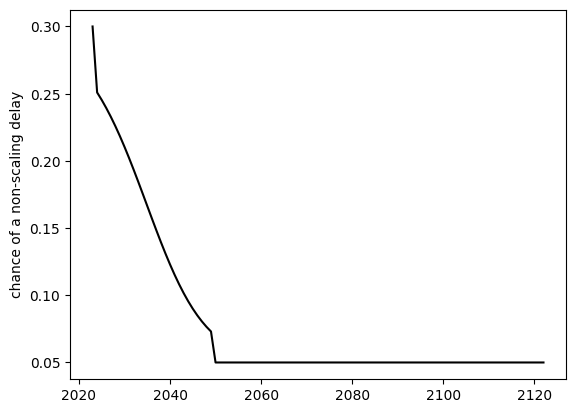

Year: 2023 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 30%
Year: 2024 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 25%
Year: 2025 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 25%
Year: 2026 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 24%
Year: 2027 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 23%
Year: 2028 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 23%
Year: 2029 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 22%
Year: 2030 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 21%
Year: 2031 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 20%
Year: 2032 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 19%
Year: 2033

In [6]:
nonscaling_points = [(2023, 0.3),
                     (2030, 0.2),
                     (2040, 0.1),
                     (2050, 0.05)]
p_nonscaling_delay = derive_nonscaling_delay_curve(nonscaling_points)
delays['integration'] = {'prob': p_nonscaling_delay, 'length': sq.lognorm(3, 30)}
plot_nonscaling_delay(plt, years, p_nonscaling_delay)
print('-')
pprint(sq.get_percentiles(delays['integration']['length'] @ 1000, digits=0))

##  Real world feedback delay

|   iter    |  target   |   push    |   shift   |   slope   |
-------------------------------------------------------------
| 6         | -0.03333  | 0.0807    | 6.722     | 2.092     |
| 45        | -0.03281  | 0.01      | 4.341     | 1.559     |
| 52        | -0.02373  | 0.01      | 5.541     | 0.8066    |
Curve params found
{'push': 0.01, 'shift': 5.541413752568876, 'slope': 0.8065973264353551}
-
## Chance of nonscaling delay ##


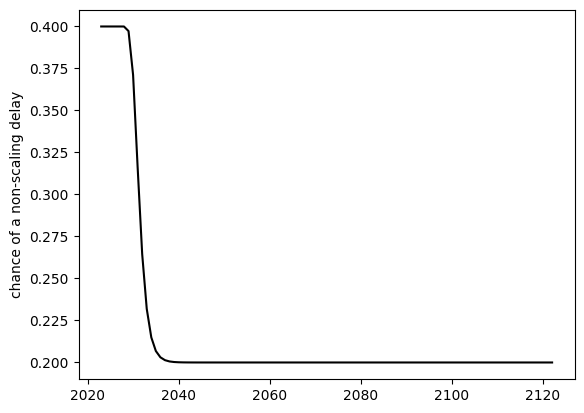

Year: 2023 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 40%
Year: 2024 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 40%
Year: 2025 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 40%
Year: 2026 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 40%
Year: 2027 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 40%
Year: 2028 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 40%
Year: 2029 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 40%
Year: 2030 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 37%
Year: 2031 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 32%
Year: 2032 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 26%
Year: 2033

In [7]:
nonscaling_points = [(2023, 0.4),
                     (2030, 0.3),
                     (2050, 0.2)]
p_nonscaling_delay = derive_nonscaling_delay_curve(nonscaling_points)
delays['real_world_feedback'] = {'prob': p_nonscaling_delay, 'length': sq.mixture([[0.8, sq.lognorm(3, 10)],
                                                                                   [0.1, sq.lognorm(10, 30)],
                                                                                   [0.1, sq.lognorm(20, 50)]])}
plot_nonscaling_delay(plt, years, p_nonscaling_delay)
print('-')
pprint(sq.get_percentiles(delays['real_world_feedback']['length'] @ 1000, digits=0))

## Policy delay (e.g., pause)

|   iter    |  target   |   push    |   shift   |   slope   |
-------------------------------------------------------------
| 4         | -0.1      | 0.06744   | 3.828     | 5.932     |
| 41        | -0.1      | 0.01      | 6.083     | 5.451     |
| 44        | -0.1      | 0.01      | 4.409     | 2.72      |
Curve params found
{'push': 0.01, 'shift': 4.4085715801475205, 'slope': 2.7196697956268543}
-
## Chance of nonscaling delay ##


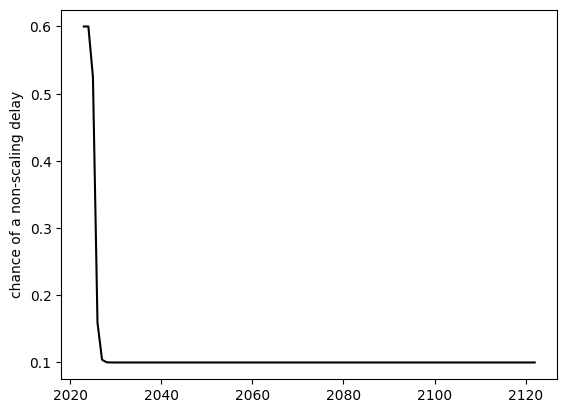

Year: 2023 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 60%
Year: 2024 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 60%
Year: 2025 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 52%
Year: 2026 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 16%
Year: 2027 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 10%
Year: 2028 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 10%
Year: 2029 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 10%
Year: 2030 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 10%
Year: 2031 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 10%
Year: 2032 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 10%
Year: 2033

In [8]:
nonscaling_points = [(2023, 0.6),
                     (2030, 0.4),
                     (2050, 0.2),
                     (2080, 0.1)]
p_nonscaling_delay = derive_nonscaling_delay_curve(nonscaling_points)
delays['policy_pause'] = {'prob': p_nonscaling_delay, 'length': sq.mixture([[0.9, sq.lognorm(1, 5)],
                                                                            [0.1, sq.lognorm(10, 100)]])}
plot_nonscaling_delay(plt, years, p_nonscaling_delay)
print('-')
pprint(sq.get_percentiles(delays['policy_pause']['length'] @ 1000, digits=0))

## Take off speeds

## Chance of nonscaling delay ##


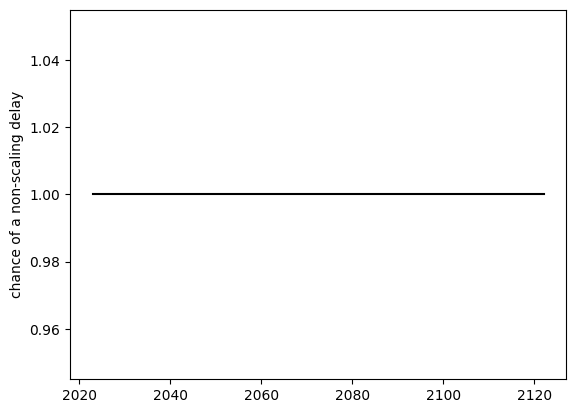

Year: 2023 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 100%
Year: 2024 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 100%
Year: 2025 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 100%
Year: 2026 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 100%
Year: 2027 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 100%
Year: 2028 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 100%
Year: 2029 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 100%
Year: 2030 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 100%
Year: 2031 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 100%
Year: 2032 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 100%


In [9]:
# https://www.lesswrong.com/posts/Gc9FGtdXhK9sCSEYu/what-a-compute-centric-framework-says-about-ai-takeoff

delays['take_off'] = {'prob': 1, 'length': sq.lognorm(1, 15)}
plot_nonscaling_delay(plt, years, lambda _: 1)
print('-')
pprint(sq.get_percentiles(delays['take_off']['length'] @ 1000, digits=0))

## Save

In [10]:
with open('caches/nonscaling_delays.dill', 'wb') as f:
    dill.dump(delays, f)
    
print('cached!')

cached!
